# Whisper Pilot Results

This notebook contains some rudimentary analysis of the results from running whisper testing using the process outlined in the [README.md](README.md).

## SDR Data

First lets load the metadata for the items that were selected for the analysis. The CSV was obtained from the [Media for Whisper Pilot](https://docs.google.com/spreadsheets/d/1sgcxy0eNwWTn1LeMVH8TDJ6J8qL8iIGfZ25t4nmYqyQ/edit#gid=0) Google Sheet.

In [1]:
import pandas

sdr = pandas.read_csv('sdr-data.csv')
sdr.head(5)

,Druid,Argo Link,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
0,bb158br2509,https://argo.stanford.edu/view/druid:bb158br2509,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the back...",English,1842,0:00:02,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Preprocessing (remove background noise). Strai...,NaN
1,bg405cn7261,https://argo.stanford.edu/view/druid:bg405cn7261,https://purl.stanford.edu/bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...","Clear spoken audio, uses language and acronyms...",English,655,0:00:24,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription. Acronyms, subject-specific terms.",NaN
2,bh446wm7842,https://argo.stanford.edu/view/druid:bh446wm7842,https://purl.stanford.edu/bh446wm7842,"Telmet, Kaja, 1950 Oral history interview with...","Clear spoken audio, in Estonian. We have Russi...",Estonian,9642,0:00:03,"Run through medium and large models, obtain Es...","Yes (vtt, English and Russian)",Translation (Estonian to English or Russian). ...,NaN
3,br525sp8033,https://argo.stanford.edu/view/druid:br525sp8033,https://purl.stanford.edu/br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...","Clear spoken audio in Russian, some cracks and...",Russian,471,0:00:04,"Run through medium and large models, obtain Ru...","Yes (vtt and txt, English and Russian)","Testing Russian transcription, and/or translat...",NaN
4,bw689yg2740,https://argo.stanford.edu/view/druid:bw689yg2740,https://purl.stanford.edu/bw689yg2740,Stanford University. Native American Cultural ...,Inconsistent audio quality due to mic placemen...,English,5080,0:00:04,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription, multiple speakers. Diarization ...",NaN


## Whisper Results

Next lets get the Whisper results for one of the test runs that were performed using the [RDS/DLSS GPU Workstation](https://docs.google.com/document/d/1k4fTuLUpT1S7WGtYTLPdE9pI_UwffiOW4-lcJKpIaW0/edit#heading=h.k6w3eccrwgdq).

In [2]:
whisper = pandas.read_csv('output-2024-04-02/report-whisper.csv')
whisper.head(5)

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions
0,bb158br2509_sl.m4a,en,281.613259,0.058499,0.057659,0.079835,0.920165,4331,103,66,96
1,bb158br2509_sl.m4a,en,267.591768,0.058499,0.057659,0.079835,0.920165,4331,103,66,96
2,bb158br2509_sl.m4a,en,222.263821,0.058720,0.058257,0.081324,0.918676,4300,107,36,123
3,bb158br2509_sl.m4a,en,222.277783,0.058720,0.058257,0.081324,0.918676,4300,107,36,123
4,bb158br2509_sl.m4a,en,279.711924,0.055188,0.054538,0.076508,0.923492,4334,102,54,94


The `file` has the DRUID embedded in it, and it's helpful to extract that for joining to our SDR metadata.

In [3]:
whisper['druid'] = whisper.file.map(lambda s: s.split('_')[0])
whisper.head(5)

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,druid
0,bb158br2509_sl.m4a,en,281.613259,0.058499,0.057659,0.079835,0.920165,4331,103,66,96,bb158br2509
1,bb158br2509_sl.m4a,en,267.591768,0.058499,0.057659,0.079835,0.920165,4331,103,66,96,bb158br2509
2,bb158br2509_sl.m4a,en,222.263821,0.058720,0.058257,0.081324,0.918676,4300,107,36,123,bb158br2509
3,bb158br2509_sl.m4a,en,222.277783,0.058720,0.058257,0.081324,0.918676,4300,107,36,123,bb158br2509
4,bb158br2509_sl.m4a,en,279.711924,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,bb158br2509


## Processing the Backlog with Whisper

Andrew Berger did some analysis of publicly available SDR media content which would benefit from transcription. He found 48,824 hours of content (175,766,400 seconds).

Based on our Whisper results how long would it take to process this content sequentially using equivalent hardware to the GPU Workstation? Note, this hardware only supports one process accessing the Whisper Large model at a time.

The Whisper results include multiple runs with the same file but with different options. Lets take the shortest runtime for each file for a best case estimate.

In [4]:
whisper = whisper.sort_values('runtime', ascending=True).groupby('druid').first()
whisper

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions
druid,,,,,,,,,,,
bb158br2509,bb158br2509_sl.m4a,en,222.263821,0.058720,0.058257,0.081324,0.918676,4300,107,36,123
bg405cn7261,bg405cn7261_v2_sl.mp4,en,101.812094,0.022913,0.022642,0.031740,0.968260,1813,17,22,3
br525sp8033,br525sp8033_FV4289_v4_sl.mp4,ru,33.909681,0.156028,0.154386,0.234346,0.765654,241,25,3,16
bw689yg2740,bw689yg2740_sl.mp4,en,611.021976,0.104156,0.099831,0.135916,0.864084,10622,433,490,255
fh290wd1772,fh290wd1772_v2_sp_sl.m4a,en,15.690757,0.292754,0.290230,0.388105,0.611895,247,39,3,59
gj097zq7635,gj097zq7635_a_sl.m4a,en,367.496455,0.098677,0.095756,0.135891,0.864109,6903,315,226,190
gk220dt2833,gk220dt2833_Ali_Shan_7of10_sl.mp4,en,90.056304,0.146730,0.141757,0.176224,0.823776,1671,65,66,145
gn213vd3845,gn213vd3845_ev_1_sl.mp4,es,39.511443,0.236593,0.235479,0.294182,0.705818,487,40,3,107
kp010zv7055,kp010zv7055_a_sl.m4a,en,54.909754,0.910236,0.806137,0.943128,0.056872,139,314,82,182


Now the Duration from the SDR data can be joined in:

In [5]:
whisper = whisper.join(sdr.set_index('Druid'))
whisper.head(5)

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,...,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
druid,,,,,,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509_sl.m4a,en,222.263821,0.058720,0.058257,0.081324,0.918676,4300,107,36,...,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the back...",English,1842,0:00:02,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Preprocessing (remove background noise). Strai...,NaN
bg405cn7261,bg405cn7261_v2_sl.mp4,en,101.812094,0.022913,0.022642,0.031740,0.968260,1813,17,22,...,https://purl.stanford.edu/bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...","Clear spoken audio, uses language and acronyms...",English,655,0:00:24,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription. Acronyms, subject-specific terms.",NaN
br525sp8033,br525sp8033_FV4289_v4_sl.mp4,ru,33.909681,0.156028,0.154386,0.234346,0.765654,241,25,3,...,https://purl.stanford.edu/br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...","Clear spoken audio in Russian, some cracks and...",Russian,471,0:00:04,"Run through medium and large models, obtain Ru...","Yes (vtt and txt, English and Russian)","Testing Russian transcription, and/or translat...",NaN
bw689yg2740,bw689yg2740_sl.mp4,en,611.021976,0.104156,0.099831,0.135916,0.864084,10622,433,490,...,https://purl.stanford.edu/bw689yg2740,Stanford University. Native American Cultural ...,Inconsistent audio quality due to mic placemen...,English,5080,0:00:04,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription, multiple speakers. Diarization ...",NaN
fh290wd1772,fh290wd1772_v2_sp_sl.m4a,en,15.690757,0.292754,0.290230,0.388105,0.611895,247,39,3,...,https://purl.stanford.edu/fh290wd1772,I Don't Know Where I'm Goin' But I'm On My Way,"Oldest format in our collections, decent audio...",English,133,0:00:00,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Transcription. Media with degraded/low quality...,NaN


Add a `processing_rate` column in terms of a ratio of the duration of the media and the time it took to process it (both in seconds). You can think of this as seconds of media processed per second.

In [6]:
whisper['processing_rate'] = whisper['Duration'] / whisper['runtime']
whisper[['Title', 'file', 'Duration', 'runtime', 'processing_rate']]

,Title,file,Duration,runtime,processing_rate
druid,,,,,
bb158br2509,Project South - S611,bb158br2509_sl.m4a,1842,222.263821,8.287449
bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...",bg405cn7261_v2_sl.mp4,655,101.812094,6.433420
br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...",br525sp8033_FV4289_v4_sl.mp4,471,33.909681,13.889839
bw689yg2740,Stanford University. Native American Cultural ...,bw689yg2740_sl.mp4,5080,611.021976,8.313940
fh290wd1772,I Don't Know Where I'm Goin' But I'm On My Way,fh290wd1772_v2_sp_sl.m4a,133,15.690757,8.476328
gj097zq7635,"Graff, Leonard Leonard Graff of National Gay R...",gj097zq7635_a_sl.m4a,2849,367.496455,7.752456
gk220dt2833,"Shan, Ali, 1941- Oral history with Ali Shan, 2...",gk220dt2833_Ali_Shan_7of10_sl.mp4,4463,90.056304,49.557885
gn213vd3845,"Blesching, Uwe. Viva Chile m--: Logos Producti...",gn213vd3845_ev_1_sl.mp4,371,39.511443,9.389685
kp010zv7055,"#28 Tangos, European Peace interviews",kp010zv7055_a_sl.m4a,1897,54.909754,34.547596


There is a lot of variability in the processing_rate!

array([[<Axes: title={'center': 'processing_rate'}>]], dtype=object)

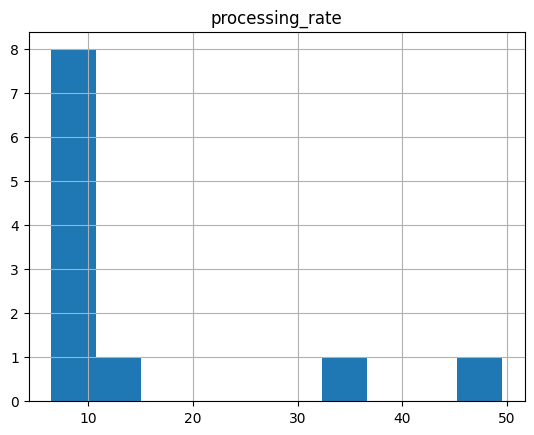

In [15]:
whisper.hist(column=['processing_rate'])

Well lets just take the average and then use it to calcuate an estimate:

In [16]:
avg_rate = whisper.processing_rate.mean()
avg_rate

14.674342653843489

In [17]:
175_766_400 / 14.674342653843489

11977803.990692792

That's 11977803.990692792 seconds to process the backlog which is:

In [18]:
11977803.990692792 / 60 / 60 / 24

138.63199063301843

So a best case estimate is 138 days.

## Amazon Processing Time

The processing time doens't mean as much for AWS Transcribe since we can simply do them all in parallel. Also, you have to poll to look if your job is completed, and the rate at which you poll is a big factor in how long the processing time ends up being. But given these caveats it is possible to calculate how long it would take to sequentially process them using a similar method.

In [19]:
aws = pandas.read_csv('output-2024-04-02/report-aws.csv')
aws.head(5)

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions
0,bb158br2509_sl.m4a,en-US,77.632743,0.066887,0.064910,0.093532,0.906468,4365,137,138,28
1,gk220dt2833_Ali_Shan_7of10_sl.mp4,en-IN,56.292077,0.142477,0.133866,0.170909,0.829091,1734,73,121,74
2,tc482fh1865_kfe_project_2023_wallace_sl.mp4,en-US,31.252870,0.118136,0.113965,0.176956,0.823044,552,42,22,7
3,kp010zv7055_a_sl.m4a,es-US,74.667621,0.907087,0.907087,0.964633,0.035367,59,96,0,480
4,qf378nj5000_sl.mp4,en-US,121.356568,1.325802,0.977316,0.999302,0.000698,143,4502,1657,2


Add the DRUID column for joining:

In [20]:
aws['druid'] = aws.file.map(lambda s: s.split('_')[0])
aws.head(5)

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,druid
0,bb158br2509_sl.m4a,en-US,77.632743,0.066887,0.064910,0.093532,0.906468,4365,137,138,28,bb158br2509
1,gk220dt2833_Ali_Shan_7of10_sl.mp4,en-IN,56.292077,0.142477,0.133866,0.170909,0.829091,1734,73,121,74,gk220dt2833
2,tc482fh1865_kfe_project_2023_wallace_sl.mp4,en-US,31.252870,0.118136,0.113965,0.176956,0.823044,552,42,22,7,tc482fh1865
3,kp010zv7055_a_sl.m4a,es-US,74.667621,0.907087,0.907087,0.964633,0.035367,59,96,0,480,kp010zv7055
4,qf378nj5000_sl.mp4,en-US,121.356568,1.325802,0.977316,0.999302,0.000698,143,4502,1657,2,qf378nj5000


In [21]:
aws = aws.set_index('druid').join(sdr.set_index('Druid'))
aws.head(5)

,file,language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,...,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
druid,,,,,,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509_sl.m4a,en-US,77.632743,0.066887,0.064910,0.093532,0.906468,4365,137,138,...,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the back...",English,1842,0:00:02,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Preprocessing (remove background noise). Strai...,NaN
gk220dt2833,gk220dt2833_Ali_Shan_7of10_sl.mp4,en-IN,56.292077,0.142477,0.133866,0.170909,0.829091,1734,73,121,...,https://purl.stanford.edu/gk220dt2833,"Shan, Ali, 1941- Oral history with Ali Shan, 2...","English speaking, good quality audio, but has ...",English,4463,0:00:06,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Transcription. Proper/place names. Straightfor...,NaN
tc482fh1865,tc482fh1865_kfe_project_2023_wallace_sl.mp4,en-US,31.252870,0.118136,0.113965,0.176956,0.823044,552,42,22,...,https://purl.stanford.edu/tc482fh1865,"Wallace, Michelle An analysis of red algae cov...",Good audio quality but lots of subject-specifi...,English,246,0:00:11,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Transcription. Subject-specific terms.\nSpeech...,NaN
kp010zv7055,kp010zv7055_a_sl.m4a,es-US,74.667621,0.907087,0.907087,0.964633,0.035367,59,96,0,...,https://argo.stanford.edu/view/druid:kp010zv7055,"#28 Tangos, European Peace interviews",Spanish language singing over music (only side...,Spanish,1897,0:00:45,"Run through medium and large models, obtain Sp...","Yes (vtt and txt, Spanish)",Spanish transcription. Speech detection thresh...,NaN
qf378nj5000,qf378nj5000_sl.mp4,en-US,121.356568,1.325802,0.977316,0.999302,0.000698,143,4502,1657,...,https://purl.stanford.edu/qf378nj5000,"Genero, Jack Interviews with five striking Chi...",Contains some Spanish language and terms as pa...,English with some Spanish terms,2294,0:00:25,"Run through medium and large models, track tim...","Yes (vtt and txt, English and Spanish)",Translation (English to Spanish). Spanish is a...,NaN


array([[<Axes: title={'center': 'processing_rate'}>]], dtype=object)

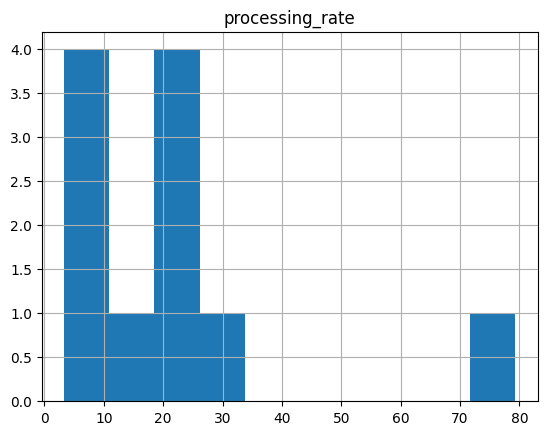

In [24]:
aws['processing_rate'] = aws['Duration'] / aws['runtime']
aws.hist(column=['processing_rate'])

In [116]:
(175_766_400 / aws.processing_rate.mean()) / 60 / 60 / 24

94.7570460469096

94 days